# Objetivos / perguntas a responder com o trabalho

- Haverá especulação imobiliária em Portugal?
- Quais as variáveis que poderão estar correlacionadas com o contínuo aumento dos imóveis em portugal.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def clean_df(df, dataset):
    
    df = df[10:364]
        
    if dataset == 'densidade_populacional':
        nome_coluna = 'Densidade Populacional'
    elif dataset == 'salarios':
        nome_coluna = 'Ganho médio mensal dos trabalhadores por conta de outrem'
        df = df.iloc[:,:16]
    elif dataset == 'preco_imoveis':
        nome_coluna = 'Valor médio dos prédios transaccionados'
        df = df.iloc[:,:15]
    elif dataset == 'pib_per_capita':
        nome_coluna = 'PIB per capita (base=2016)'
        df = df.iloc[:,:15]
        df = df[:46]
    else:
        return
    
    df.columns = df.iloc[0] 
    df = df.drop(10) 
    df = df.reset_index(drop=True) 
    df.dropna(inplace=True, axis=1, how='all')
    df.rename(inplace=True, columns={'Anos':'Designação'})
    df = df.rename_axis(None, axis=1)
    
    df_municipios = df[df['Âmbito Geográfico'] == 'Município']
    df_nuts_III = df[df['Âmbito Geográfico'] == 'NUTS III']
    df_nuts_II = df[df['Âmbito Geográfico'] == 'NUTS II']
    
    df_municipios.drop(columns=['Âmbito Geográfico'], axis=1, inplace=True)
    df_nuts_III.drop(columns=['Âmbito Geográfico'], axis=1, inplace=True)
    df_nuts_II.drop(columns=['Âmbito Geográfico'], axis=1, inplace=True)
    
    df_municipios = df_municipios.set_index('Designação').stack().reset_index(level=1, drop=True).reset_index(name=nome_coluna)
    df_nuts_III = df_nuts_III.set_index('Designação').stack().reset_index(level=1, drop=True).reset_index(name=nome_coluna)
    df_nuts_II = df_nuts_II.set_index('Designação').stack().reset_index(level=1, drop=True).reset_index(name=nome_coluna)
    
    lista_anos = df.columns.values.tolist()[2:]
    lista_anos_municipios = lista_anos*len(df_municipios['Designação'].unique())
    lista_anos_nuts_III = lista_anos*len(df_nuts_III['Designação'].unique())
    lista_anos_nuts_II = lista_anos*len(df_nuts_II['Designação'].unique())
    
    df_municipios.insert(1, "Ano", lista_anos_municipios)
    df_nuts_III.insert(1, "Ano", lista_anos_nuts_III)
    df_nuts_II.insert(1, "Ano", lista_anos_nuts_II)
    
    return (df_municipios, df_nuts_III, df_nuts_II, df)

# Densidade Populacional
## N.º médio de indivíduos por Km2

In [3]:
df_densidade_populacional = pd.read_excel(r'C:/Users/utilizador/Documents/GitHub/psn/final-project/data/densidade_populacional.xlsx')

In [4]:
(df_municipios_densidade_populacional, df_nuts_III_densidade_populacional, df_nuts_II_densidade_populacional, df_densidade_populacional) = clean_df(df_densidade_populacional, 'densidade_populacional')

C:\Users\utilizador\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
df_municipios_densidade_populacional

,Designação,Ano,Densidade Populacional
0,Arcos de Valdevez,2001,55.2
1,Arcos de Valdevez,2009,52
2,Arcos de Valdevez,2010,51.5
3,Arcos de Valdevez,2011,51
4,Arcos de Valdevez,2012,50.4
...,...,...,...
3999,Porto Santo,2016,120.3
4000,Porto Santo,2017,120.1
4001,Porto Santo,2018,120.3
4002,Porto Santo,2019,120.6


In [6]:
df_municipios_densidade_populacional['Ano'].unique()

array([2001, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int64)

In [7]:
df_nuts_III_densidade_populacional

,Designação,Ano,Densidade Populacional
0,Alto Minho,2001,112.7
1,Alto Minho,2009,111.4
2,Alto Minho,2010,110.9
3,Alto Minho,2011,110.3
4,Alto Minho,2012,109.6
...,...,...,...
437,Ilha de Porto Santo,2016,120.3
438,Ilha de Porto Santo,2017,120.1
439,Ilha de Porto Santo,2018,120.3
440,Ilha de Porto Santo,2019,120.6


In [8]:
df_nuts_II_densidade_populacional

,Designação,Ano,Densidade Populacional
0,Norte,2001,173.2
1,Norte,2009,174.3
2,Norte,2010,173.8
3,Norte,2011,173.4
4,Norte,2012,172.7
...,...,...,...
86,Região Autónoma da Madeira,2016,319
87,Região Autónoma da Madeira,2017,317.7
88,Região Autónoma da Madeira,2018,317.1
89,Região Autónoma da Madeira,2019,317


# Ganho médio mensal dos trabalhadores por conta de outrem

In [9]:
df_ganho_medio = pd.read_excel(r'C:/Users/utilizador/Documents/GitHub/psn/final-project/data/ganho_media_conta_outrem.xlsx')

In [10]:
(df_municipios_ganho_medio, df_nuts_III_ganho_medio, df_nuts_II_ganho_medio, df_ganho_medio) = clean_df(df_ganho_medio, 'salarios')

C:\Users\utilizador\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
df_municipios_ganho_medio

,Designação,Ano,Ganho médio mensal dos trabalhadores por conta de outrem
0,Arcos de Valdevez,1985,151.2
1,Arcos de Valdevez,1991,274.3
2,Arcos de Valdevez,2002,585.3
3,Arcos de Valdevez,2009,734.3
4,Arcos de Valdevez,2010,757.7
...,...,...,...
4307,Porto Santo,2015,1091.9
4308,Porto Santo,2016,1076
4309,Porto Santo,2017,1087
4310,Porto Santo,2018,1142.9


In [12]:
df_nuts_III_ganho_medio

,Designação,Ano,Ganho médio mensal dos trabalhadores por conta de outrem
0,Alto Minho,1985,0
1,Alto Minho,1991,0
2,Alto Minho,2002,0
3,Alto Minho,2009,0
4,Alto Minho,2010,855.5
...,...,...,...
471,Ilha de Porto Santo,2015,1091.9
472,Ilha de Porto Santo,2016,1076
473,Ilha de Porto Santo,2017,1087
474,Ilha de Porto Santo,2018,1142.9


In [13]:
df_nuts_II_ganho_medio

,Designação,Ano,Ganho médio mensal dos trabalhadores por conta de outrem
0,Norte,1985,0
1,Norte,1991,0
2,Norte,2002,0
3,Norte,2009,0
4,Norte,2010,940.7
...,...,...,...
93,Região Autónoma da Madeira,2015,1058.3
94,Região Autónoma da Madeira,2016,1063.5
95,Região Autónoma da Madeira,2017,1078.7
96,Região Autónoma da Madeira,2018,1096.4


# Dataset dos munícipios

In [14]:
df_municipios = pd.read_csv(r'C:/Users/utilizador/Documents/GitHub/psn/final-project/data/municipios.csv')

In [15]:
df_municipios

,Designação,Ano,População residente,Densidade populacional,Jovens (%),População em idade activa (%),Idosos (%),Índice de envelhecimento,População estrangeira (2),População estrangeira em % da população residente (2),...,Saldo financeiro da Câmara Municipal,Transferências recebidas no total das receitas da Câmara Municipal (%),Crimes registados pelas polícias por mil habitantes,Consumo de energia eléctrica por habitante (kWh),Resíduos urbanos recolhidos selectivamente por habitante (kg),Despesas do município em ambiente (%),Alojamentos turísticos (6),distrito,geometry,Índice de envelhecimento normalizado
0,Portugal,2010,10573100,0.0,15.2,66.3,18.5,122,443055,4.2,...,65461,49.0,40.1,4776.8,76.2,8,2011,NaN,NaN,0.131148
1,Portugal,2019,10286263,111.5,13.6,64.4,22.0,161,588976,5.7,...,0,0.0,32.6,0.0,109.6,0,6833,NaN,NaN,0.189270
2,Abrantes,2010,39637,0.0,12.8,61.6,25.6,200,652,1.6,...,1937,63.8,32.4,4075.9,66.2,5,4,Santarém,POLYGON ((-8.080126762390137 39.27783203125006...,0.247392
3,Abrantes,2019,35254,49.3,10.9,60.3,28.8,264,497,1.4,...,0,0.0,21.6,0.0,65.1,0,14,Santarém,POLYGON ((-8.080126762390137 39.27783203125006...,0.342772
4,Águeda,2010,47875,0.0,13.9,67.3,18.8,135,1176,2.5,...,39,54.0,33.8,5421.9,52.4,5,6,Aveiro,POLYGON ((-8.462350845336914 40.50518035888678...,0.150522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,Viseu,2019,97120,191.5,13.5,65.3,21.2,157,2624,2.7,...,0,0.0,25.8,0.0,64.5,0,30,Viseu,POLYGON ((-8.006034851074219 40.54524230957037...,0.183308
614,Vizela,2010,23739,0.0,17.0,72.1,10.9,64,140,0.6,...,120,66.4,38.3,3906.8,42.1,4,0,Braga,POLYGON ((-8.277605056762695 41.35190582275396...,0.044709
615,Vizela,2019,23869,966.3,13.2,71.6,15.3,116,191,0.8,...,0,0.0,17.8,0.0,66.7,0,3,Braga,POLYGON ((-8.277605056762695 41.35190582275396...,0.122206
616,Vouzela,2010,10656,0.0,12.7,60.7,26.6,210,92,0.9,...,642,77.3,31.0,2937.2,26.1,7,1,Viseu,POLYGON ((-8.021496772766056 40.70087051391613...,0.262295


# Preço médio dos imóveis transaccionados

In [16]:
df_preco_imoveis = pd.read_excel(r'C:/Users/utilizador/Documents/GitHub/psn/final-project/data/preco_imoveis.xlsx')

In [17]:
(df_municipios_preco_imoveis, df_nuts_III_preco_imoveis, df_nuts_II_preco_imoveis, df_preco_imoveis) = clean_df(df_preco_imoveis, 'preco_imoveis')
df_preco_imoveis

C:\Users\utilizador\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Âmbito Geográfico,Designação,2000,2001,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NUTS 2013,Portugal,53344,55705,90134,91491,73379,66809,75249,81590,87111,91294,107381,108016,112470
1,NUTS I,Continente,53935,56466,91136,92910,74442,67726,76295,83229,88988,92840,109085,109778,114253
2,NUTS II,Norte,47145,49768,70692,74477,59203,52615,59331,62244,63112,67999,73546,80153,83455
3,NUTS III,Alto Minho,26874,29389,50685,51396,38311,35166,32437,36238,33592,43792,50174,50090,55355
4,Município,Arcos de Valdevez,22576,24851,37248,33845,24927,39154,23673,19596,20136,27714,28291,30437,34657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,Município,Santa Cruz,68514,72781,94387,105546,85412,77238,100117,81148,71933,93099,106026,95380,91323
349,Município,Santana,15434,22293,27704,26096,28792,17325,18515,10726,10150,11246,47665,25299,34506
350,Município,São Vicente,20604,20128,23549,36924,27206,19648,22353,34465,48461,32949,32849,45500,34685
351,NUTS III,Ilha de Porto Santo,49418,57587,68857,79572,73997,83816,73568,79060,0,0,74844,0,73391


# Produto Interno Bruto per Capita

A análise com o PIB tem que ser feita por região (NUTS II e NUTS III)

Depois, ao agregar os dados todos, consoante o NUT a que pertence atribuir ao município correspondente para podermos fazer uma análise por município.

In [18]:
df_PIB = pd.read_excel(r'C:/Users/utilizador/Documents/GitHub/psn/final-project/data/pib_per_capita.xlsx')

In [19]:
(df_municipios_PIB, df_nuts_III_PIB, df_nuts_II_PIB, df_PIB) = clean_df(df_PIB, 'pib_per_capita')
df_PIB

C:\Users\utilizador\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Âmbito Geográfico,Designação,2001,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NUTS 2013,Portugal,13102.3,16598.4,16987.5,16679.6,16005.5,16303.7,16638.1,17350.1,18061.2,19023.4,19952.1,20840.9,19431.5
1,NUTS I,Continente,13169.9,16624.8,17018.4,16701.4,16047.9,16340.5,16680.6,17395.6,18108,19069.7,20009,20900.8,19520.9
2,NUTS II,Norte,10628.5,13254.9,13700.3,13503.3,13149,13514.3,13978.1,14606.6,15324.2,16102.3,17040.6,17774.3,16894.6
3,NUTS III,Alto Minho,8558.4,11648,12361.4,11932.2,11852.7,12555.9,12739.5,12946.4,13737.2,14614.2,15547.7,16120.9,15430
4,NUTS III,Cávado,9861,12761.1,12934.1,12727.2,12542.8,12919.8,13422.4,13985.4,14953,15889.5,16766.5,18006.7,17300.3
5,NUTS III,Ave,10027,11715.1,12302.3,12244.1,12376.6,12848.5,13451.4,14414.7,15060.9,15701.6,16739,17110.9,16534
6,NUTS III,Área Metropolitana do Porto,12870.9,15341.5,15774,15494.9,14965.2,15222.7,15746.8,16469.2,17223.1,18225.1,19183.7,19963.3,18719.3
7,NUTS III,Alto Tâmega,6975.9,10579.5,10914.2,10851.6,10405.6,11185.4,10868.2,11002.2,11671.3,12042.2,12590.6,13309.7,12687.7
8,NUTS III,Tâmega e Sousa,7158.5,9577.4,9939.8,9870.7,9633.2,9967.1,10291.3,10765.1,11196.3,11568.6,12136.6,12634.8,12310
9,NUTS III,Douro,7709.9,10967.4,11529.5,11556.8,11264.8,11701.4,12064,12443.9,13121.8,13410.4,14460.8,15272,14600.8


# Taxas de juro sobre novas operações de empréstimos (média anual) a particulares: total e por tipo de finalidade

In [20]:
df_taxas_juro = pd.read_excel(r'C:/Users/utilizador/Documents/GitHub/psn/final-project/data/taxa_juro_habitacao.xlsx')
df_taxas_juro = df_taxas_juro[6:25]
df_taxas_juro = df_taxas_juro.iloc[:,:4]
df_taxas_juro.columns = df_taxas_juro.iloc[0] 
df_taxas_juro = df_taxas_juro.drop(6) 
df_taxas_juro = df_taxas_juro.reset_index(drop=True)
df_taxas_juro = df_taxas_juro.rename_axis(None, axis=1)

In [21]:
df_taxas_juro

,Anos,Total,Crédito à habitação,Crédito para consumo e outros fins
0,2003,5.88,3.83,8.48
1,2004,5.24,3.49,7.94
2,2005,4.89,3.38,7.47
3,2006,5.31,4.01,7.46
4,2007,6.06,4.8,8.42
5,2008,6.88,5.44,8.94
6,2009,4.82,2.73,7.31
7,2010,4.41,2.47,6.92
8,2011,6.28,3.77,8.21
9,2012,6.75,3.88,7.94


# Análise dos dados

Vamos utilizar o dataset dos municípios portugueses que foram recolhidos no portal PORDATA e organizados ao longo das aulas. Para complementar os nosso dados, utilizaremos outros datasets, obtidos no mesmo portal, dos quais destaco:
- Ganho médio mensal dos trabalhos por contra de outrém (https://www.pordata.pt/Municipios/Ganho+m%c3%a9dio+mensal+dos+trabalhadores+por+conta+de+outrem+total+e+por+sexo-282) - apesar desta informação estar presente no dataset dos municípios apenas contempla informação relativa a 2010, pelo que não podemos fazer uma análise ao longo do tempo. 

- Produto Interno Bruto per Capita (https://www.pordata.pt/Municipios/PIB+per+capita+(base+2016)-896)

- Taxas de juro sobre novas operações de empréstimos (média anual) a particulares (https://www.pordata.pt/Portugal/Taxas+de+juro+sobre+novas+opera%c3%a7%c3%b5es+de+empr%c3%a9stimos+(m%c3%a9dia+anual)+a+particulares+total+e+por+tipo+de+finalidade-2845)

- Preço médio dos prédios transaccionados (https://www.pordata.pt/Municipios/Valor+m%c3%a9dio+dos+pr%c3%a9dios+transaccionados+total++urbanos+e+r%c3%basticos-89)

Para além da informação recolhida no portal da PORDATA recolhemos também informação na plataforma de imobiliário Idealista para obtermos os dados relativos ao preço do metro quadrado ao longo dos anos.

## Iremos fazer uma análise relativa ao ano 2010 vs 2019.

Agregemos então os datasets extra ao dataset dos municípios.

In [22]:
df_municipios

,Designação,Ano,População residente,Densidade populacional,Jovens (%),População em idade activa (%),Idosos (%),Índice de envelhecimento,População estrangeira (2),População estrangeira em % da população residente (2),...,Saldo financeiro da Câmara Municipal,Transferências recebidas no total das receitas da Câmara Municipal (%),Crimes registados pelas polícias por mil habitantes,Consumo de energia eléctrica por habitante (kWh),Resíduos urbanos recolhidos selectivamente por habitante (kg),Despesas do município em ambiente (%),Alojamentos turísticos (6),distrito,geometry,Índice de envelhecimento normalizado
0,Portugal,2010,10573100,0.0,15.2,66.3,18.5,122,443055,4.2,...,65461,49.0,40.1,4776.8,76.2,8,2011,NaN,NaN,0.131148
1,Portugal,2019,10286263,111.5,13.6,64.4,22.0,161,588976,5.7,...,0,0.0,32.6,0.0,109.6,0,6833,NaN,NaN,0.189270
2,Abrantes,2010,39637,0.0,12.8,61.6,25.6,200,652,1.6,...,1937,63.8,32.4,4075.9,66.2,5,4,Santarém,POLYGON ((-8.080126762390137 39.27783203125006...,0.247392
3,Abrantes,2019,35254,49.3,10.9,60.3,28.8,264,497,1.4,...,0,0.0,21.6,0.0,65.1,0,14,Santarém,POLYGON ((-8.080126762390137 39.27783203125006...,0.342772
4,Águeda,2010,47875,0.0,13.9,67.3,18.8,135,1176,2.5,...,39,54.0,33.8,5421.9,52.4,5,6,Aveiro,POLYGON ((-8.462350845336914 40.50518035888678...,0.150522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,Viseu,2019,97120,191.5,13.5,65.3,21.2,157,2624,2.7,...,0,0.0,25.8,0.0,64.5,0,30,Viseu,POLYGON ((-8.006034851074219 40.54524230957037...,0.183308
614,Vizela,2010,23739,0.0,17.0,72.1,10.9,64,140,0.6,...,120,66.4,38.3,3906.8,42.1,4,0,Braga,POLYGON ((-8.277605056762695 41.35190582275396...,0.044709
615,Vizela,2019,23869,966.3,13.2,71.6,15.3,116,191,0.8,...,0,0.0,17.8,0.0,66.7,0,3,Braga,POLYGON ((-8.277605056762695 41.35190582275396...,0.122206
616,Vouzela,2010,10656,0.0,12.7,60.7,26.6,210,92,0.9,...,642,77.3,31.0,2937.2,26.1,7,1,Viseu,POLYGON ((-8.021496772766056 40.70087051391613...,0.262295


In [23]:
df_ganho_medio

,Âmbito Geográfico,Designação,1985,1991,2002,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NUTS 2013,Portugal,170.5,405.1,817.4,1034.2,1075.3,1083.8,1094.7,1093.3,1090.6,1094.1,1105.6,1130.8,1166.9,1206.3
1,NUTS I,Continente,0,0,0,0,1076.3,1084.6,1095.6,1093.8,1093.2,1096.7,1107.9,1133.3,1170.3,1209.9
2,NUTS II,Norte,0,0,0,0,940.7,949.1,958.1,963.4,967.2,975,986.9,1015.6,1056.6,1100.4
3,NUTS III,Alto Minho,0,0,0,0,855.5,860.8,864.7,878.9,881.1,895.5,899.6,950.1,978.1,1013.3
4,Município,Arcos de Valdevez,151.2,274.3,585.3,734.3,757.7,764.5,789.9,802.3,797.3,801.3,815.8,875.8,882.1,891.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,Município,Santa Cruz,211.4,350.9,785.8,1020.5,1018.6,1042.9,1057.4,1070.8,1064.1,1055.1,1050.7,1071.7,1084.3,1116.1
349,Município,Santana,191.5,446.5,629.8,874.6,832.5,817,825.5,846.9,828.4,790.6,781.1,821.8,862.4,883.2
350,Município,São Vicente,168.8,359.4,880.5,789.7,794.4,790.6,820,867.8,863,811.5,805.3,835.9,854.1,866.1
351,NUTS III,Ilha de Porto Santo,162.4,434.9,781.9,999.3,1052.5,1151.9,1125.4,1210.5,1125.6,1091.9,1076,1087,1142.9,1175.5


Adicionemos os dados, relativos ao ano de 2019, ao dataset dos municípios.

### Ganho médio mensal dos trabalhadores por conta de outrem, €

In [24]:
for i in df_municipios.index:
    if df_municipios['Ganho médio mensal dos trabalhadores por conta de outrem, €'].iloc[i] == 0 and df_municipios['Ano'].iloc[i] == 2019:
        ganho_medio_2019 = df_ganho_medio[df_ganho_medio['Designação'] == df_municipios['Designação'].iloc[i]][2019]
        df_municipios['Ganho médio mensal dos trabalhadores por conta de outrem, €'].iloc[i] = ganho_medio_2019.values[0]

C:\Users\utilizador\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Adicionemos o dataset extra, relativo aos valores dos imóveis transaccionados nos anos 2010 e 2019.

In [25]:
df_municipios.insert(len(df_municipios.columns), 'Valor médio dos prédios transaccionados', 0)
df_municipios

,Designação,Ano,População residente,Densidade populacional,Jovens (%),População em idade activa (%),Idosos (%),Índice de envelhecimento,População estrangeira (2),População estrangeira em % da população residente (2),...,Transferências recebidas no total das receitas da Câmara Municipal (%),Crimes registados pelas polícias por mil habitantes,Consumo de energia eléctrica por habitante (kWh),Resíduos urbanos recolhidos selectivamente por habitante (kg),Despesas do município em ambiente (%),Alojamentos turísticos (6),distrito,geometry,Índice de envelhecimento normalizado,Valor médio dos prédios transaccionados
0,Portugal,2010,10573100,0.0,15.2,66.3,18.5,122,443055,4.2,...,49.0,40.1,4776.8,76.2,8,2011,NaN,NaN,0.131148,0
1,Portugal,2019,10286263,111.5,13.6,64.4,22.0,161,588976,5.7,...,0.0,32.6,0.0,109.6,0,6833,NaN,NaN,0.189270,0
2,Abrantes,2010,39637,0.0,12.8,61.6,25.6,200,652,1.6,...,63.8,32.4,4075.9,66.2,5,4,Santarém,POLYGON ((-8.080126762390137 39.27783203125006...,0.247392,0
3,Abrantes,2019,35254,49.3,10.9,60.3,28.8,264,497,1.4,...,0.0,21.6,0.0,65.1,0,14,Santarém,POLYGON ((-8.080126762390137 39.27783203125006...,0.342772,0
4,Águeda,2010,47875,0.0,13.9,67.3,18.8,135,1176,2.5,...,54.0,33.8,5421.9,52.4,5,6,Aveiro,POLYGON ((-8.462350845336914 40.50518035888678...,0.150522,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,Viseu,2019,97120,191.5,13.5,65.3,21.2,157,2624,2.7,...,0.0,25.8,0.0,64.5,0,30,Viseu,POLYGON ((-8.006034851074219 40.54524230957037...,0.183308,0
614,Vizela,2010,23739,0.0,17.0,72.1,10.9,64,140,0.6,...,66.4,38.3,3906.8,42.1,4,0,Braga,POLYGON ((-8.277605056762695 41.35190582275396...,0.044709,0
615,Vizela,2019,23869,966.3,13.2,71.6,15.3,116,191,0.8,...,0.0,17.8,0.0,66.7,0,3,Braga,POLYGON ((-8.277605056762695 41.35190582275396...,0.122206,0
616,Vouzela,2010,10656,0.0,12.7,60.7,26.6,210,92,0.9,...,77.3,31.0,2937.2,26.1,7,1,Viseu,POLYGON ((-8.021496772766056 40.70087051391613...,0.262295,0


In [26]:
for i in df_preco_imoveis.index:
    preco_2010 = df_preco_imoveis[2010].iloc[i]
    preco_2019 = df_preco_imoveis[2019].iloc[i]
    
    designacao = df_preco_imoveis['Designação'].iloc[i]
    
    vals_2010 = df_municipios[(df_municipios['Designação'] == designacao) & (df_municipios['Ano'] == 2010)]['Valor médio dos prédios transaccionados']
    vals_2019 = df_municipios[(df_municipios['Designação'] == designacao) & (df_municipios['Ano'] == 2019)]['Valor médio dos prédios transaccionados']
    
    if vals_2010.index.size != 0:
        df_municipios.at[vals_2010.index[0],'Valor médio dos prédios transaccionados']=preco_2010
    
    if vals_2019.index.size != 0:
        df_municipios.at[vals_2019.index[0],'Valor médio dos prédios transaccionados']=preco_2019

In [27]:
df_municipios

,Designação,Ano,População residente,Densidade populacional,Jovens (%),População em idade activa (%),Idosos (%),Índice de envelhecimento,População estrangeira (2),População estrangeira em % da população residente (2),...,Transferências recebidas no total das receitas da Câmara Municipal (%),Crimes registados pelas polícias por mil habitantes,Consumo de energia eléctrica por habitante (kWh),Resíduos urbanos recolhidos selectivamente por habitante (kg),Despesas do município em ambiente (%),Alojamentos turísticos (6),distrito,geometry,Índice de envelhecimento normalizado,Valor médio dos prédios transaccionados
0,Portugal,2010,10573100,0.0,15.2,66.3,18.5,122,443055,4.2,...,49.0,40.1,4776.8,76.2,8,2011,NaN,NaN,0.131148,91491
1,Portugal,2019,10286263,111.5,13.6,64.4,22.0,161,588976,5.7,...,0.0,32.6,0.0,109.6,0,6833,NaN,NaN,0.189270,112470
2,Abrantes,2010,39637,0.0,12.8,61.6,25.6,200,652,1.6,...,63.8,32.4,4075.9,66.2,5,4,Santarém,POLYGON ((-8.080126762390137 39.27783203125006...,0.247392,44159
3,Abrantes,2019,35254,49.3,10.9,60.3,28.8,264,497,1.4,...,0.0,21.6,0.0,65.1,0,14,Santarém,POLYGON ((-8.080126762390137 39.27783203125006...,0.342772,35999
4,Águeda,2010,47875,0.0,13.9,67.3,18.8,135,1176,2.5,...,54.0,33.8,5421.9,52.4,5,6,Aveiro,POLYGON ((-8.462350845336914 40.50518035888678...,0.150522,41257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,Viseu,2019,97120,191.5,13.5,65.3,21.2,157,2624,2.7,...,0.0,25.8,0.0,64.5,0,30,Viseu,POLYGON ((-8.006034851074219 40.54524230957037...,0.183308,83536
614,Vizela,2010,23739,0.0,17.0,72.1,10.9,64,140,0.6,...,66.4,38.3,3906.8,42.1,4,0,Braga,POLYGON ((-8.277605056762695 41.35190582275396...,0.044709,72616
615,Vizela,2019,23869,966.3,13.2,71.6,15.3,116,191,0.8,...,0.0,17.8,0.0,66.7,0,3,Braga,POLYGON ((-8.277605056762695 41.35190582275396...,0.122206,69140
616,Vouzela,2010,10656,0.0,12.7,60.7,26.6,210,92,0.9,...,77.3,31.0,2937.2,26.1,7,1,Viseu,POLYGON ((-8.021496772766056 40.70087051391613...,0.262295,11231


Analisemos as variáveis
- População residente
- População estrangeira em % da população residente (2)
- Ganho médio mensal dos trabalhadores por conta de outrem, €
- Desempregados inscritos nos centros de emprego em % da população residente
- Alojamentos turísticos (6)

In [28]:
variaveis_a_analisar = ['Designação', 'Ano', 'População residente', 'População estrangeira em % da população residente (2)', 'Ganho médio mensal dos trabalhadores por conta de outrem, €', 'Desempregados inscritos nos centros de emprego em % da população residente', 'Alojamentos turísticos (6)', 'Valor médio dos prédios transaccionados'] 
sub_df_municipios = df_municipios

for col in sub_df_municipios.columns:
    if col not in variaveis_a_analisar:
        sub_df_municipios.drop(col, inplace=True, axis=1)

In [29]:
sub_df_municipios

,Designação,Ano,População residente,População estrangeira em % da população residente (2),"Ganho médio mensal dos trabalhadores por conta de outrem, €",Desempregados inscritos nos centros de emprego em % da população residente,Alojamentos turísticos (6),Valor médio dos prédios transaccionados
0,Portugal,2010,10573100,4.2,1075.0,8,2011,91491
1,Portugal,2019,10286263,5.7,1206.3,5,6833,112470
2,Abrantes,2010,39637,1.6,969.0,9,4,44159
3,Abrantes,2019,35254,1.4,1109.4,6,14,35999
4,Águeda,2010,47875,2.5,911.0,7,6,41257
...,...,...,...,...,...,...,...,...
613,Viseu,2019,97120,2.7,1036.9,5,30,83536
614,Vizela,2010,23739,0.6,685.0,12,0,72616
615,Vizela,2019,23869,0.8,858.8,5,3,69140
616,Vouzela,2010,10656,0.9,762.0,5,1,11231


## Analisemos os 10 municípios cujos valores por metro quadrado dos imóveis são superiores.

Estes dados foram obtidos ao fazer web scrapping à plataforma do Idealista. Apesar do objetivo inicial ser uma análise relativa aos anos 2010 vs 2019, visto que o dataset dos municípios contemplam essas datas, optei por ir buscar excel por excel das diferentes variáveis, relativo aos anos de 2015 a 2020.

In [30]:
df_10_mais_caros = pd.read_excel(r'C:/Users/utilizador/Documents/GitHub/psn/final-project/data/municipios_mais_caros.xlsx')

In [31]:
df_10_mais_caros

,Município,Ano,"Preço por m2, €"
0,Lisboa,2015,2253
1,Lisboa,2016,2456
2,Lisboa,2017,3653
3,Lisboa,2018,3564
4,Lisboa,2019,6440
5,Lisboa,2020,5068
6,Cascais,2015,1755
7,Cascais,2016,1940
8,Cascais,2017,2644
9,Cascais,2018,3129


In [32]:
municipios = []

for i in df_10_mais_caros.index:
    if df_10_mais_caros.iloc[i]['Município'] not in municipios:
        municipios.append(df_10_mais_caros.iloc[i]['Município'])
        
print(municipios)

['Lisboa', 'Cascais', 'Oeiras', 'Loulé', 'Albufeira', 'Lagos', 'Tavira', 'Porto', 'Odivelas', 'Lagoa']


In [33]:
df_10_mais_caros

,Município,Ano,"Preço por m2, €"
0,Lisboa,2015,2253
1,Lisboa,2016,2456
2,Lisboa,2017,3653
3,Lisboa,2018,3564
4,Lisboa,2019,6440
5,Lisboa,2020,5068
6,Cascais,2015,1755
7,Cascais,2016,1940
8,Cascais,2017,2644
9,Cascais,2018,3129


In [34]:
df_10_mais_caros

,Município,Ano,"Preço por m2, €"
0,Lisboa,2015,2253
1,Lisboa,2016,2456
2,Lisboa,2017,3653
3,Lisboa,2018,3564
4,Lisboa,2019,6440
5,Lisboa,2020,5068
6,Cascais,2015,1755
7,Cascais,2016,1940
8,Cascais,2017,2644
9,Cascais,2018,3129


In [35]:
anos = df_10_mais_caros['Ano'].unique()

for i in df_municipios_densidade_populacional.index:
    if df_municipios_densidade_populacional.loc[i]['Designação'] not in municipios or df_municipios_densidade_populacional.loc[i]['Ano'] not in anos:
        df_municipios_densidade_populacional.drop(axis=0, index=i, inplace=True)
        
df_municipios_densidade_populacional

,Designação,Ano,Densidade Populacional
410,Porto,2015,5224.6
411,Porto,2016,5175
412,Porto,2017,5175.1
413,Porto,2018,5189.2
414,Porto,2019,5213.5
415,Porto,2020,5232.9
2477,Cascais,2015,2154.7
2478,Cascais,2016,2162.5
2479,Cascais,2017,2169.4
2480,Cascais,2018,2177.6


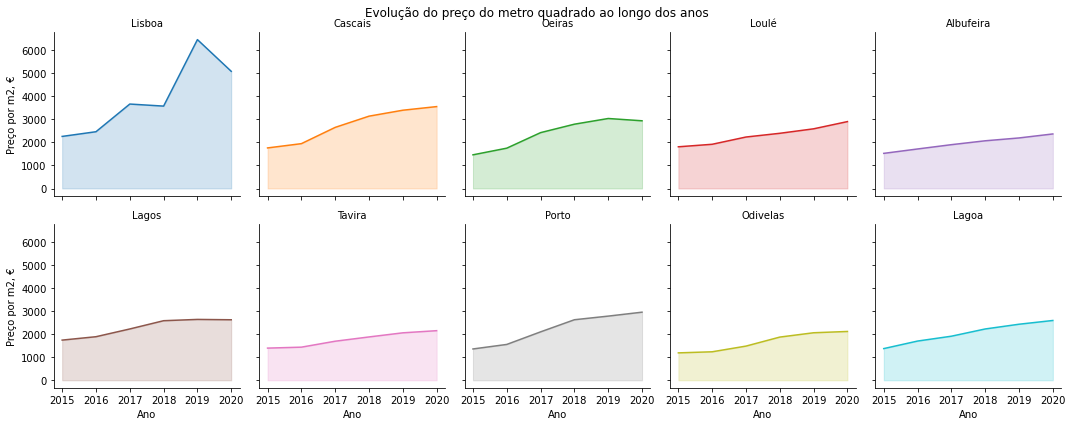

In [36]:
# Create a grid : initialize it
g = sns.FacetGrid(df_10_mais_caros, col='Município', hue='Município', col_wrap=5)

# Add the line over the area with the plot function
g = g.map(plt.plot, 'Ano', 'Preço por m2, €')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'Ano', 'Preço por m2, €', alpha=0.2).set_titles("{col_name} Município")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolução do preço do metro quadrado ao longo dos anos')

# Show the graph
plt.savefig('preco_vs_ano.png')
plt.show()

In [48]:
df_10_mais_caros[(df_10_mais_caros['Município']=='Lisboa') & (df_10_mais_caros['Ano']!=2021)]['Preço por m2, €'].sort_values(ascending=False).head(1).values[0]

6440

In [49]:
df_municipios_densidade_populacional[(df_municipios_densidade_populacional['Designação'] == 'Lisboa') & (df_municipios_densidade_populacional['Ano'] > 2014)]['Densidade Populacional'].sort_values(ascending=False).head(1).values[0]

5093.1

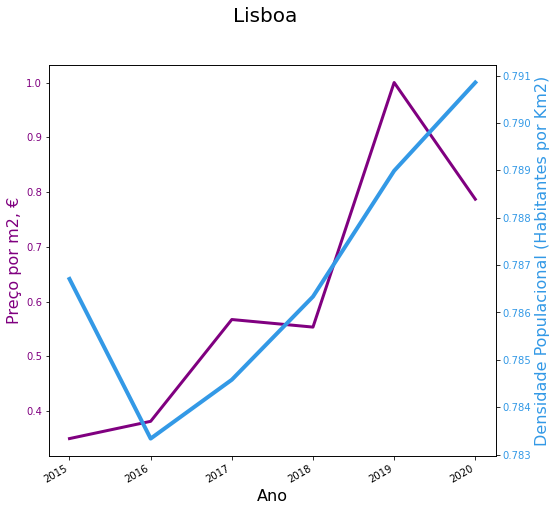

In [52]:
purple = "#800080"
blue = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot([2015,2016,2017,2018,2019,2020], df_10_mais_caros[(df_10_mais_caros['Município']=='Lisboa') & (df_10_mais_caros['Ano']!=2021)]['Preço por m2, €']/6440, color=purple, lw=3)
ax2.plot([2015,2016,2017,2018,2019,2020], df_municipios_densidade_populacional[(df_municipios_densidade_populacional['Designação'] == 'Lisboa') & (df_municipios_densidade_populacional['Ano'] > 2014)]['Densidade Populacional']/6440, color=blue, lw=4)

ax1.set_xlabel("Ano", fontsize = 16)
ax1.set_ylabel("Preço por m2, €", color=purple, fontsize=16)
ax1.tick_params(axis="y", labelcolor=purple)

ax2.set_ylabel("Densidade Populacional (Habitantes por Km2)", color=blue, fontsize=16)
ax2.tick_params(axis="y", labelcolor=blue)

fig.suptitle("Lisboa", fontsize=20)
fig.autofmt_xdate()
plt.savefig('Lisboa_preco_densidade.png')

In [ ]:
purple = "#800080"
blue = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot([2015,2016,2017,2018,2019,2020], df_10_mais_caros[(df_10_mais_caros['Município']=='Cascais') & (df_10_mais_caros['Ano']!=2021)]['Preço por m2, €'], color=purple, lw=3)
ax2.plot([2015,2016,2017,2018,2019,2020], df_municipios_densidade_populacional[(df_municipios_densidade_populacional['Designação'] == 'Cascais') & (df_municipios_densidade_populacional['Ano'] > 2014)]['Densidade Populacional'], color=blue, lw=4)

ax1.set_xlabel("Ano", fontsize = 16)
ax1.set_ylabel("Preço por m2, €", color=purple, fontsize=16)
ax1.tick_params(axis="y", labelcolor=purple)

ax2.set_ylabel("Densidade Populacional (Habitantes por Km2)", color=blue, fontsize=16)
ax2.tick_params(axis="y", labelcolor=blue)

fig.suptitle("Cascais", fontsize=20)
fig.autofmt_xdate()
plt.savefig('Cascais_preco_densidade.png')

In [ ]:
purple = "#800080"
blue = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot([2015,2016,2017,2018,2019,2020], df_10_mais_caros[(df_10_mais_caros['Município']=='Oeiras') & (df_10_mais_caros['Ano']!=2021)]['Preço por m2, €'], color=purple, lw=3)
ax2.plot([2015,2016,2017,2018,2019,2020], df_municipios_densidade_populacional[(df_municipios_densidade_populacional['Designação'] == 'Oeiras') & (df_municipios_densidade_populacional['Ano'] > 2014)]['Densidade Populacional'], color=blue, lw=4)

ax1.set_xlabel("Ano", fontsize = 16)
ax1.set_ylabel("Preço por m2, €", color=purple, fontsize=16)
ax1.tick_params(axis="y", labelcolor=purple)

ax2.set_ylabel("Densidade Populacional (Habitantes por Km2)", color=blue, fontsize=16)
ax2.tick_params(axis="y", labelcolor=blue)

fig.suptitle("Oeiras", fontsize=20)
fig.autofmt_xdate()
plt.savefig('Oeiras_preco_densidade.png')

In [ ]:
df_municipios_densidade_populacional['Designação'].unique()

### É possível verificar que o preço por metro quadrado está relacionado com a densidade populacional

Analisemos agora segundo outras variáveis.

In [54]:
df_10_mais_caros[(df_10_mais_caros['Município']=='Lisboa') & (df_10_mais_caros['Ano']!=2021) &(df_10_mais_caros['Ano']!=2020)]['Preço por m2, €'].sort_values(ascending=False).head(1).values[0]

6440

In [53]:
df_municipios_ganho_medio[(df_municipios_ganho_medio['Designação'] == 'Lisboa') & (df_municipios_ganho_medio['Ano'] > 2014)]['Ganho médio mensal dos trabalhadores por conta de outrem'].sort_values(ascending=False).head(1).values[0]

1669.4

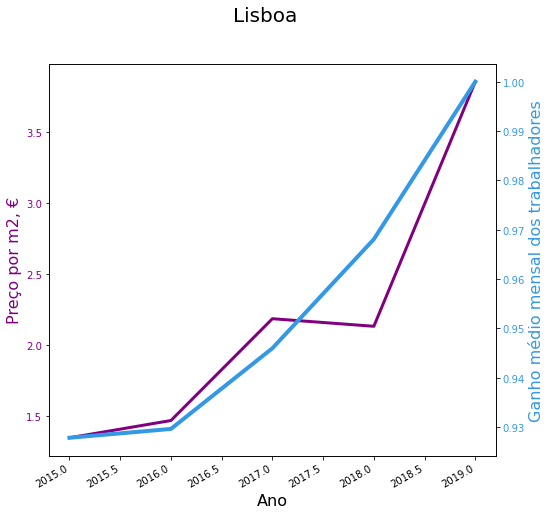

In [57]:
for i in df_municipios_ganho_medio.index:
    if df_municipios_ganho_medio.loc[i]['Designação'] not in municipios or df_municipios_ganho_medio.loc[i]['Ano'] not in anos:
        df_municipios_ganho_medio.drop(axis=0, index=i, inplace=True)
        
purple = "#800080"
blue = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot([2015,2016,2017,2018,2019], df_10_mais_caros[(df_10_mais_caros['Município']=='Lisboa') & (df_10_mais_caros['Ano']!=2021) &(df_10_mais_caros['Ano']!=2020)]['Preço por m2, €']/1669.4, color=purple, lw=3)
ax2.plot([2015,2016,2017,2018,2019], df_municipios_ganho_medio[(df_municipios_ganho_medio['Designação'] == 'Lisboa') & (df_municipios_ganho_medio['Ano'] > 2014)]['Ganho médio mensal dos trabalhadores por conta de outrem']/1669.4, color=blue, lw=4)

ax1.set_xlabel("Ano", fontsize = 16)
ax1.set_ylabel("Preço por m2, €", color=purple, fontsize=16)
ax1.tick_params(axis="y", labelcolor=purple)

ax2.set_ylabel("Ganho médio mensal dos trabalhadores", color=blue, fontsize=16)
ax2.tick_params(axis="y", labelcolor=blue)

fig.suptitle("Lisboa", fontsize=20)
fig.autofmt_xdate()
plt.savefig('Lisboa_preco_salario.png')

In [ ]:
for i in df_municipios_ganho_medio.index:
    if df_municipios_ganho_medio.loc[i]['Designação'] not in municipios or df_municipios_ganho_medio.loc[i]['Ano'] not in anos:
        df_municipios_ganho_medio.drop(axis=0, index=i, inplace=True)
        
purple = "#800080"
blue = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot([2015,2016,2017,2018,2019], df_10_mais_caros[(df_10_mais_caros['Município']=='Cascais') & (df_10_mais_caros['Ano']!=2021) &(df_10_mais_caros['Ano']!=2020)]['Preço por m2, €'], color=purple, lw=3)
ax2.plot([2015,2016,2017,2018,2019], df_municipios_ganho_medio[(df_municipios_ganho_medio['Designação'] == 'Cascais') & (df_municipios_ganho_medio['Ano'] > 2014)]['Ganho médio mensal dos trabalhadores por conta de outrem'], color=blue, lw=4)

ax1.set_xlabel("Ano", fontsize = 16)
ax1.set_ylabel("Preço por m2, €", color=purple, fontsize=16)
ax1.tick_params(axis="y", labelcolor=purple)

ax2.set_ylabel("Ganho médio mensal dos trabalhadores", color=blue, fontsize=16)
ax2.tick_params(axis="y", labelcolor=blue)

fig.suptitle("Cascais", fontsize=20)
fig.autofmt_xdate()
plt.savefig('Cascais_preco_salario.png')

# Apesar dos salários aumentarem, não aumentam proporcionalmente ao aumento do preço por metro quadrado. Note-se o caso de Lisboa e Cascais

In [ ]:
aumento_preco_lisboa = round((100/5)*(df_10_mais_caros[(df_10_mais_caros['Município'] == 'Lisboa') & (df_10_mais_caros['Ano'] == 2020)]['Preço por m2, €'].values[0])/(df_10_mais_caros[(df_10_mais_caros['Município'] == 'Lisboa') & (df_10_mais_caros['Ano'] == 2015)]['Preço por m2, €'].values[0]),2)
aumento_salario_lisboa = round((100/5)*(df_municipios_ganho_medio[(df_municipios_ganho_medio['Designação'] == 'Lisboa') & (df_municipios_ganho_medio['Ano'] == 2019)]['Ganho médio mensal dos trabalhadores por conta de outrem'].values[0])/(df_municipios_ganho_medio[(df_municipios_ganho_medio['Designação'] == 'Lisboa') & (df_municipios_ganho_medio['Ano'] == 2015)]['Ganho médio mensal dos trabalhadores por conta de outrem'].values[0]),2)

aumento_preco_cascais = round((100/5)*(df_10_mais_caros[(df_10_mais_caros['Município'] == 'Cascais') & (df_10_mais_caros['Ano'] == 2020)]['Preço por m2, €'].values[0])/(df_10_mais_caros[(df_10_mais_caros['Município'] == 'Cascais') & (df_10_mais_caros['Ano'] == 2015)]['Preço por m2, €'].values[0]),2)
aumento_salario_cascais = round((100/5)*(df_municipios_ganho_medio[(df_municipios_ganho_medio['Designação'] == 'Cascais') & (df_municipios_ganho_medio['Ano'] == 2019)]['Ganho médio mensal dos trabalhadores por conta de outrem'].values[0])/(df_municipios_ganho_medio[(df_municipios_ganho_medio['Designação'] == 'Cascais') & (df_municipios_ganho_medio['Ano'] == 2015)]['Ganho médio mensal dos trabalhadores por conta de outrem'].values[0]),2)

print('(Aumento do preço por metro quadrado) ' + str(aumento_preco_lisboa) + ' vs ' + str(aumento_salario_lisboa) + ' (Aumento do salário)')
print('(Aumento do preço por metro quadrado) ' + str(aumento_preco_cascais) + ' vs ' + str(aumento_salario_cascais) + ' (Aumento do salário)')

### O preço do metro quadrado aumento o dobro do que os salários aumentaram. Hoje em dia os portugueses, dificilmente, têm dinheiro para a entrada da casa. Os salários não aumentarem proporcionalmente é um dos problemas.

# Analisemos por fim, as variáveis a taxa de juro de créditos de habitação e o produto interno bruto per capita vs o preço por metro quadrado.

## PIB

In [ ]:
PIB_portugal = df_PIB.loc[0].transpose()

evolucao_pib = [PIB_portugal[2015],PIB_portugal[2016],PIB_portugal[2017],PIB_portugal[2018],PIB_portugal[2019],PIB_portugal[2020]]
print(evolucao_pib)

## Taxa de juro

In [ ]:
evolucao_taxas_juro = df_taxas_juro[12:18]['Crédito à habitação'].values
print(evolucao_taxas_juro)

# Analisando novamente em Lisboa e em Cascais, o efeito da variação das taxas de juros à habitação e o valor do produto interno bruto

In [ ]:
purple = "#800080"
blue = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot([2015,2016,2017,2018,2019,2020], [1140,1297,1538,1790,2028,2147], color=purple, lw=3)
ax2.plot([2015,2016,2017,2018,2019,2020], evolucao_taxas_juro, color=blue, lw=4)

ax1.set_xlabel("Ano", fontsize = 16)
ax1.set_ylabel("Preço por m2, €", color=purple, fontsize=16)
ax1.tick_params(axis="y", labelcolor=purple)

ax2.set_ylabel("Taxas de juro sobre novas operações de empréstimos (média anual)", color=blue, fontsize=16)
ax2.tick_params(axis="y", labelcolor=blue)

fig.suptitle("Portugal", fontsize=20)
fig.autofmt_xdate()
plt.savefig('taxas_juro_preco.png')

In [ ]:
purple = "#800080"
blue = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot([2015,2016,2017,2018,2019,2020], [1140,1297,1538,1790,2028,2147], color=purple, lw=3)
ax2.plot([2015,2016,2017,2018,2019,2020], evolucao_pib, color=blue, lw=4)

ax1.set_xlabel("Ano", fontsize = 16)
ax1.set_ylabel("Preço por m2, €", color=purple, fontsize=16)
ax1.tick_params(axis="y", labelcolor=purple)

ax2.set_ylabel("Produto Interno Bruto per Capita", color=blue, fontsize=16)
ax2.tick_params(axis="y", labelcolor=blue)

fig.suptitle("Portugal", fontsize=20)
fig.autofmt_xdate()
plt.savefig('pib.png')

# É possível verificar que, com o aumento do PIB, o preço médio do metro quadrado em portugal aumenta e que, com a diminuição das taxas de juro o preço do metro quadrado em portugal aumenta.

- Em relação à diminuição das taxas de juro de crédito à habitação faz sentido, pois ao haver uma diminuição nas taxas de juro há muito mais empréstimos à habitação cedidos pelo que a procura por imóveis aumenta. E com o aumento da procura há o aumento dos preços.
- Uma explicação para o PIB será: um maior nível de rendimento cria condições mais favoráveis para adquirir uma habitação, o que aumenta a procura de habitações, criando pressões para que o preço de habitação aumente.

Tanto o PIB (o aumento) como as taxas de juro (a diminuição) provocam um aumento da pressão no mercado imobiliário, pelo que os preços aumentam.